# SD212: Graph mining
## Lab 6: Hierarchical clustering

You will learn how to represent a graph by a dendrogram and how to cut this dendrogram to get clusterings at different resolutions. 

## Import

In [1]:
import networkx as nx

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [6]:
import scipy.cluster.hierarchy as sch

## Set colors

In [7]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

## Data

You will need the following datasets (the same as in previous labs, no need to download them again):
* [Les Misérables](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)<br>  Graph connecting the characters of the [novel of Victor Hugo](https://fr.wikisource.org/wiki/Les_Misérables) when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together. 
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools).

## 1. Dendrogram


## Toy graph

In [22]:
edges = [(7,5),(5,3),(3,7),(4,5),(8,6),(7,4),(1,6),(9,8),(7,8),(2,9),(8,2),(1,9)]
toy_graph = nx.Graph()
toy_graph.add_edges_from(edges)

In [23]:
graph = toy_graph

In [24]:
# Set positions
pos = nx.spring_layout(graph)

<IPython.core.display.Javascript object>


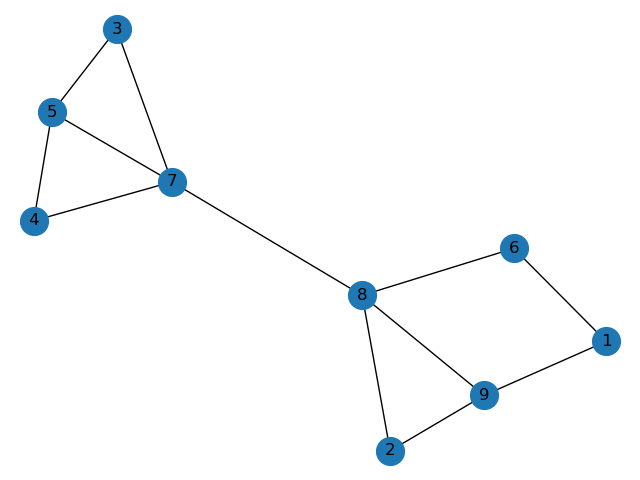

In [25]:
# Visualization
plt.figure()
nx.draw(graph, pos, node_size = 400, with_labels = True)
plt.show()

Consider the dendrogram returned by the [Ward method](https://en.wikipedia.org/wiki/Ward%27s_method) applied to the above 2D layout of the graph:

In [12]:
layout = np.array(list(pos.values()))

In [26]:
nodes = list(pos.keys())

In [27]:
dendrogram = sch.linkage(layout, method =  'ward')

<IPython.core.display.Javascript object>


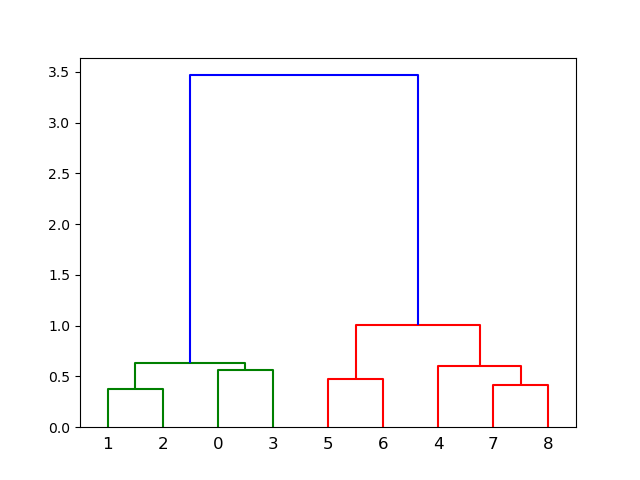

In [28]:
plt.figure()
sch.dendrogram(dendrogram)
plt.show()

## To do

* What is the first node pair that is merged? You may look at the first row of the array `dendrogram`.
* Infer the meaning of each column of the array `dendrogram`.
* What is the best clustering that can be extracted from the dendrogram for 2 clusters? for 3 clusters?
* Complete the function `extract_clusters` below and test it on the above dendrogram.

In [29]:
dendrogram
# The first node pair which will be merge is 1-2
# Column 1 and 2 correspond to the nodes or fictive nodes created from the intersection of other nodes
# Column 3 corresponds to the distance between two nodes.
# Column 4 corresponds to the number of real nodes comprised in each vertex

array([[ 1.        ,  2.        ,  0.37662069,  2.        ],
       [ 7.        ,  8.        ,  0.4129189 ,  2.        ],
       [ 5.        ,  6.        ,  0.47799152,  2.        ],
       [ 0.        ,  3.        ,  0.56311057,  2.        ],
       [ 4.        , 10.        ,  0.60745015,  3.        ],
       [ 9.        , 12.        ,  0.63516758,  4.        ],
       [11.        , 13.        ,  1.01009615,  5.        ],
       [14.        , 15.        ,  3.46680248,  9.        ]])

In [30]:
# The best separation for 2 clusters would be the one with nodes 14 and 15 as root nodes.
# The best separation for 3 clusters would be the one with nodes 14, 11 and 13 as root nodes 

In [52]:
def extract_clusters(nodes, dendrogram, nb_clusters):
    '''
    nodes: list 
        list of nodes 
    dendrogram: np array
        dendrogram
    nb_clusters: int
        target number of clusters
        
    Returns: dict 
        cluster of each node
    '''    
    n = dendrogram.shape[0] + 1
    cluster = {i: [i] for i in range(n)}
    print(cluster)
    for t in range(n - nb_clusters):
        # to be completed (proceed to the successive merges)
        left_index = int(dendrogram[t][0])
        right_index = int(dendrogram[t][1])
        left = cluster[left_index]
        right = cluster[right_index]
        cluster[n+t] = left+right
        del(cluster[left_index])
        del(cluster[right_index])
    
    print(cluster)
    clusters = list(cluster.values())
    # reindexing nodes and clusters
    C = {nodes[i]: k for k,c in enumerate(clusters) for i in c}
    return C

In [53]:
C = extract_clusters(nodes, dendrogram,2)

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8]}
{14: [1, 2, 0, 3], 15: [5, 6, 4, 7, 8]}


In [54]:
# Set colors
node_colors = [colors[C[i] % len(colors)] for i in graph.nodes()]

<IPython.core.display.Javascript object>


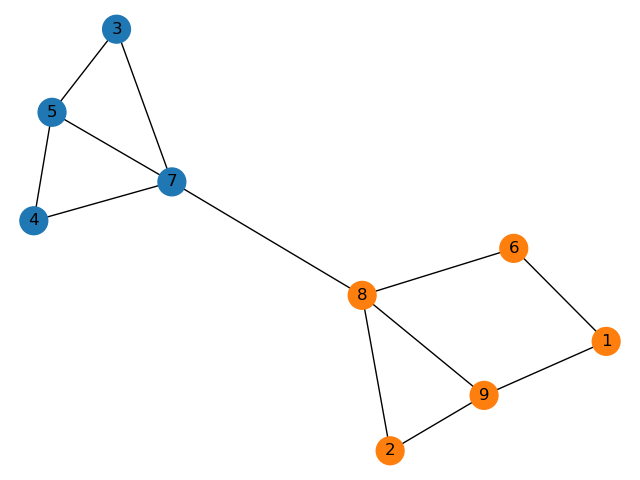

In [56]:
# Visualization
plt.figure()
nx.draw(graph, pos, node_size = 400, node_color = node_colors, with_labels = True)
plt.show()

## Karate-club graph

Consider the [Karate-Club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club):

In [57]:
karate = nx.karate_club_graph()

In [58]:
graph = karate

In [59]:
# Get ground-truth clustering
clubs = nx.get_node_attributes(graph, 'club')
club_names = list(set(clubs.values()))
club_index = {name: i for i,name in enumerate(club_names)}
C_ground_truth = {i:club_index[graph.node[i]['club']] for i in graph.nodes()}

In [60]:
# Set positions
pos = nx.spring_layout(graph)

In [61]:
# Set colors
node_colors = [colors[C_ground_truth[i] % len(colors)] for i in graph.nodes()]

<IPython.core.display.Javascript object>


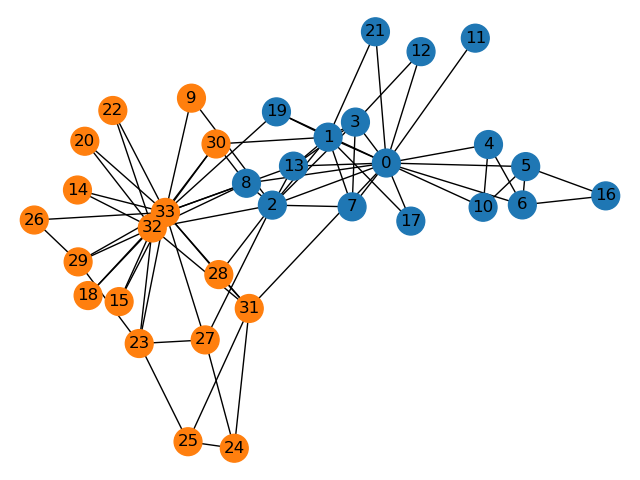

In [67]:
# Visualization
plt.figure()
nx.draw(graph, pos, node_size = 400, node_color = node_colors, with_labels = True)
plt.show()

Consider the dendrogram returned by the [Ward method](https://en.wikipedia.org/wiki/Ward%27s_method) applied to the above 2D layout of the graph:

In [63]:
layout = np.array(list(pos.values()))

In [68]:
nodes = list(pos.keys())

In [69]:
dendrogram = sch.linkage(layout, method =  'ward')

<IPython.core.display.Javascript object>


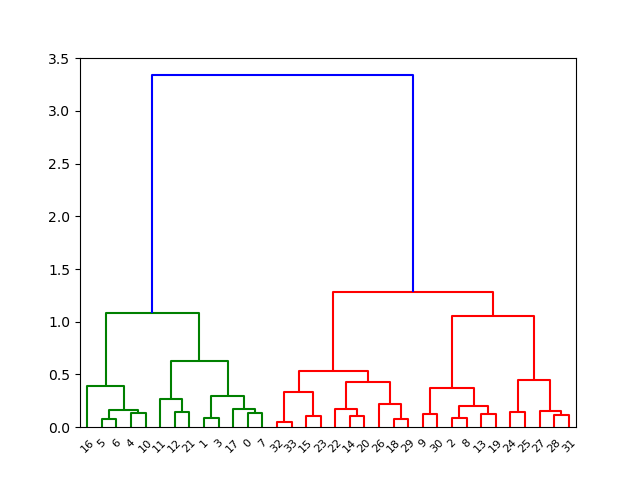

In [70]:
plt.figure()
sch.dendrogram(dendrogram, labels=nodes)
plt.show()

## To do

* Does the dendrogram give the 2 ground-truth clusters of the Karate Club? Try several instances of the layout.

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33]}
{64: [16, 5, 6, 4, 10, 11, 12, 21, 1, 3, 17, 0, 7], 65: [32, 33, 15, 23, 22, 14, 20, 26, 18, 29, 9, 30, 2, 8, 13, 19, 24, 25, 27, 28, 31]}


<IPython.core.display.Javascript object>


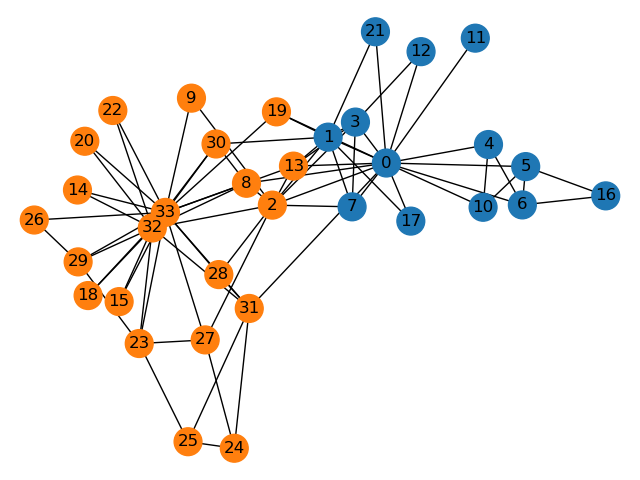

In [71]:
C = extract_clusters(nodes, dendrogram,2)
node_colors = [colors[C[i] % len(colors)] for i in graph.nodes()]
# Visualization
plt.figure()
nx.draw(graph, pos, node_size = 400, node_color = node_colors, with_labels = True)
plt.show()

## 2. Agglomerative algorithm

We now consider the agglomerative algorithm where the nearest nodes are successively merged. The proximity between nodes $i,j$ is defined by:
$$
\sigma(i,j) = v \frac{A_{ij}}{w_iw_j}
$$
where 
* $A$ is the weighted adjacency matrix of the graph, 
* $w_i = \sum_j A_{ij}$ is the weight of node $i$,
* $v= \sum_{ij}A_{ij}$ is the volume of the graph.

The graph is assumed to be undirected and connected.

## Basic algorithm

We first consider a basic algorithm where the node pair $i,j$ to be merged is searched among all edges:

In [74]:
def get_nearest_nodes(graph):
    '''
    graph: networkx graph
        undirected, connected graph with edge and node weights
        
    Returns: 
        i,j: int
            nodes to be merged
        dist: float 
            distance between i,j, given by w_i * w_j / A_ij
    '''    
    min_dist = np.inf
    for i,j in graph.edges():
        if i != j:
            dist = graph.nodes[i]['weight'] * graph.nodes[j]['weight'] / graph[i][j]['weight'] 
            if dist < min_dist:
                min_dist = dist
                i_ = i
                j_ = j
    i,j,dist = i_,j_,min_dist
    return i,j,dist

In [75]:
def merge_nodes(graph, i, j, ij):
    '''
    graph: networkx graph
        undirected graph with edge and node weights
    i,j: nodes
        nodes to be merged
    ij: node
        new node index
    '''    
    neighbors = set(graph.neighbors(i)) - {i,j}
    for k in neighbors:
        if graph.has_edge(ij,k):
            graph[ij][k]['weight'] += graph[i][k]['weight']
        else:
            graph.add_edge(ij,k,weight = graph[i][k]['weight'])
    neighbors = set(graph.neighbors(j)) - {i,j}
    for k in neighbors:
        if graph.has_edge(ij,k):
            graph[ij][k]['weight'] += graph[j][k]['weight']
        else:
            graph.add_edge(ij,k,weight = graph[j][k]['weight'])   
    graph.add_edge(ij,ij, weight = 0)
    if graph.has_edge(i,i):
        graph[ij][ij]['weight'] += graph[i][i]['weight']
    if graph.has_edge(j,j):
        graph[ij][ij]['weight'] += graph[j][j]['weight']
    if graph.has_edge(i,j):
        graph[ij][ij]['weight'] += graph[i][j]['weight'] 
        
    graph.nodes[ij]['weight'] = graph.nodes[i]['weight'] + graph.nodes[j]['weight']
    graph.remove_nodes_from([i,j])

## To do

* Complete the function `basic_hierarchical_clustering` below.
* Test it on the toy graph. 
* Do the hierarchical clustering of the Karate-Club graph; get the clustering with 2 clusters and compare it with the ground-truth clustering.
* Do the hierarchical clustering of the graph Les Miserables. Display the clustering with 8 clusters.

In [76]:
def basic_hierarchical_clustering(graph):
    '''
    graph: networkx graph
        undirected, connected graph 
        
    Returns: np array
        dendrogram
    '''        
    dendrogram = []
    
    nodes = list(graph.nodes())
    node_index = {u:i for i,u in enumerate(graph)}
    aggregate_graph = nx.relabel_nodes(graph, node_index)
    
    if nx.get_edge_attributes(aggregate_graph,'weight') == {}:
        for i,j in aggregate_graph.edges():
            aggregate_graph[i][j]['weight'] = 1
    
    for i in aggregate_graph.nodes():
        aggregate_graph.nodes[i]['size'] = 1
        aggregate_graph.nodes[i]['weight'] = 0

    v = 0
    for i,j in aggregate_graph.edges():
        aggregate_graph.nodes[i]['weight'] += aggregate_graph[i][j]['weight']
        aggregate_graph.nodes[j]['weight'] += aggregate_graph[i][j]['weight']
        v += 2 * aggregate_graph[i][j]['weight']
        
    n = aggregate_graph.number_of_nodes()
    for t in range(n - 1):
        # to be completed (find the node pair to be merged, update the dendrogram and proceed to the merge)
        
        i,j,dist = get_nearest_nodes(aggregate_graph)
        size = aggregate_graph.nodes[j]['size']+aggregate_graph.nodes[i]['size']
        merge_nodes(aggregate_graph, i, j, n+t)
        aggregate_graph.nodes[n+t]['size'] = size
        
        dendrogram.append([i, j, dist, size])
    return np.array(dendrogram)

In [77]:
miserables = nx.read_graphml("miserables.graphml", node_type = int)

In [78]:
graph = miserables

In [79]:
# Set positions
pos = nx.spring_layout(graph)

In [80]:
# Get labels
name = nx.get_node_attributes(graph, 'name')

<IPython.core.display.Javascript object>


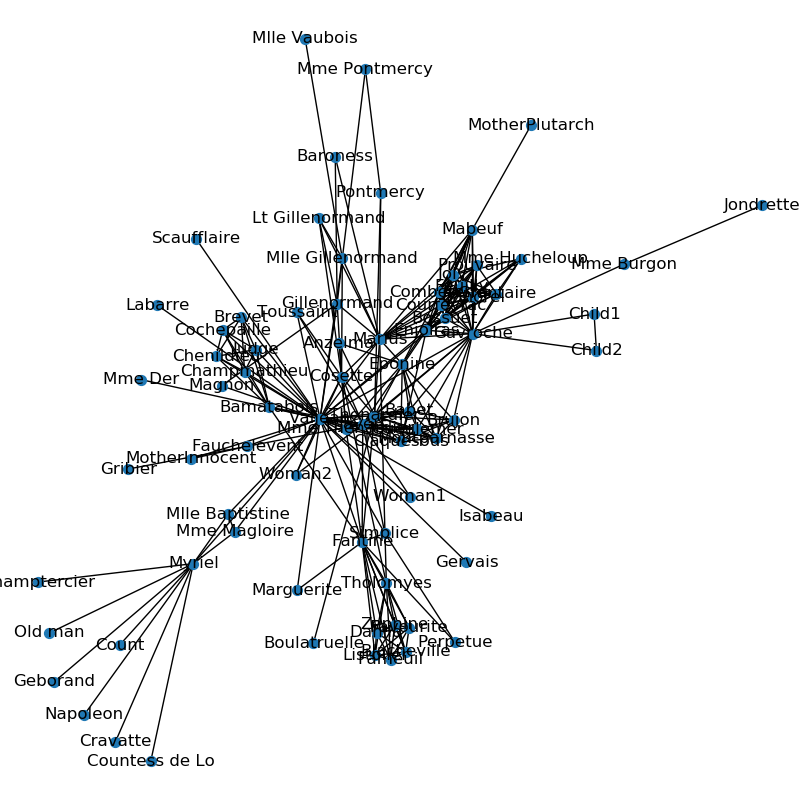

In [81]:
# Visualization
plt.figure(figsize = (8,8))
nx.draw(graph, pos, node_size = 50, labels = name)
plt.show()

## Nearest-neighbor chain

We now consider a more efficient algorithm based on the nearest-neighbor chain.

Since the merges are not done in increasing order of distance, we need a function to reorder the dendrogram at the end of the algorithm:

In [ ]:
def reorder_dendrogram(dendrogram):
    '''
    dendrogram: np array
        dendrogram
        
    Returns: np array
        reordered dendrogram
    '''        
    n = np.shape(dendrogram)[0] + 1
    order = np.zeros((2, n - 1), float)
    order[0] = np.arange(n - 1)
    order[1] = np.array(dendrogram)[:, 2]
    index = np.lexsort(order)
    node_index = np.arange(2 * n - 1)
    for t in range(n - 1):
        node_index[n + index[t]] = n + t
    return np.array([[node_index[int(dendrogram[t][0])], node_index[int(dendrogram[t][1])],
                      dendrogram[t][2], dendrogram[t][3]] for t in range(n - 1)])[index, :]

## To do

* Complete the function `hierarchical_clustering` below.
* Test it on the toy graph. 
* Do the hierarchical clustering of the Openflights graph; display the clustering with 20 clusters.
* Do the hierarchical clustering of Wikipedia for schools; list the top-5 pages of the clustering with 20 clusters.

In [ ]:
def hierarchical_clustering(graph):
    '''
    graph: networkx graph
        undirected, connected graph 
        
    Returns: np array
        dendrogram
    '''        
    dendrogram = []        
    
    nodes = list(graph.nodes())
    mapping = {u: i for i,u in enumerate(graph.nodes())}
    aggregate_graph = nx.relabel_nodes(graph, mapping)
    
    if nx.get_edge_attributes(aggregate_graph,'weight') == {}:
        for i,j in aggregate_graph.edges():
            aggregate_graph[i][j]['weight'] = 1
    
    for i in aggregate_graph.nodes():
        aggregate_graph.nodes[i]['size'] = 1
        aggregate_graph.nodes[i]['weight'] = 0
        
    v = 0
    for i,j in aggregate_graph.edges():
        aggregate_graph.nodes[i]['weight'] += aggregate_graph[i][j]['weight']
        aggregate_graph.nodes[j]['weight'] += aggregate_graph[i][j]['weight']
        v += 2 * aggregate_graph[i][j]['weight']
    
    nodes = list(aggregate_graph.nodes())
    n = len(nodes)
    next_index = n
    
    while n > 1:
        chain = [nodes[0]]
        while chain:
            i = chain.pop()
            neighbors = set(aggregate_graph.neighbors(i)) - {i}
            min_dist = np.inf
            nearest_neighbor = None
            for j in neighbors:
                dist = aggregate_graph.nodes[i]['weight'] * aggregate_graph.nodes[j]['weight'] / v 
                / aggregate_graph[i][j]['weight'] 
                if dist < min_dist:
                    nearest_neighbor = j
                    min_dist = dist
                elif dist == min_dist:
                    nearest_neighbor = min(j, nearest_neighbor)
            dist = min_dist
            j = nearest_neighbor
            if chain:
                k = chain.pop()
                if k == j:
                    # to be completed 
                    size = aggregate_graph.nodes[j]['size']+aggregate_graph.nodes[i]['size']
                    merge_nodes(aggregate_graph, i, j, next_index)
                    aggregate_graph.nodes[next_index]['size'] = size
                    
                    dendrogram.append([i,j,dist,size])
                    next_index += 1
                else:
                    chain.append(k)
                    chain.append(i)
                    chain.append(j)
            else:
                chain.append(i)
                chain.append(j)
        nodes = list(aggregate_graph.nodes())
        n = len(nodes)
    
    dendrogram = np.array(dendrogram)
    return reorder_dendrogram(dendrogram)

In [ ]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [ ]:
wikipedia = nx.read_graphml("wikipedia_schools.graphml", node_type = int)

In [ ]:
graph = max(nx.connected_component_subgraphs(wikipedia.to_undirected()), key=len) 

## To do

* Complete the function `extract_dendrograms` below that extracts the (sub-)dendrograms associated with a cut.
* Use this function to explore the hierarchical clustering of pages about animals in Wikipedia for Schools. 

In [ ]:
def extract_dendrograms(nodes, dendrogram, nb_clusters):
    '''
    nodes: list 
        list of nodes 
    dendrogram: np array
        dendrogram
    nb_clusters: int
        target number of clusters
        
    Returns: list of tuples
        (nodes, dendrogram) for each cluster
    '''    
    result = []
    return result